In [1]:

# Import Dependenices 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn style
sns.set_style('whitegrid')
# Import More Dependenices 
%matplotlib inline
import matplotlib
from datetime import datetime
# warnings 
import warnings
warnings.filterwarnings("ignore")

# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import json 
import csv
import gmap

In [2]:
#Read csv XRP
xrp_csv = pd.read_csv("resources/XRPUSD.csv")
xrp_csv.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06


In [3]:
# Read CSV bitcoin 
btc_csv = pd.read_csv("resources/BTCUSD.csv")
btc_csv.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1643846400,2022-02-03 00:00:00,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02 00:00:00,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01 00:00:00,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31 00:00:00,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30 00:00:00,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [4]:
# ethereum
eth_csv = pd.read_csv("resources/ETHUSD.csv")
eth_csv.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03 00:00:00,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02 00:00:00,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01 00:00:00,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31 00:00:00,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30 00:00:00,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [5]:
# dogecoin 
ltc_csv = pd.read_csv("resources/LTCUSD.csv")
ltc_csv.head()

,unix,date,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03 00:00:00,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [6]:
#Merge XRP & BTC
combined_xrp_btc_df = pd.merge(xrp_csv, btc_csv, on=["unix","date"])
combined_xrp_btc_df.head()

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume XRP,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume BTC,Volume USD_y
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [7]:
#rename columns 
combined_xrp_btc_df = combined_xrp_btc_df.rename(columns={"symbol_x":"XRP Symbol",
                                                          "open_x":"XRP Open",
                                                          "high_x":"XRP High", 
                                                          "low_x":"XRP Low",
                                                         "close_x": "XRP Close",
                                                         "Volume USD_x":"XRP Volume USD",
                                                         "symbol_y":"BTC Symbol",
                                                          "open_y":"BTC Open",
                                                          "high_y":"BTC High", 
                                                          "low_y":"BTC Low",
                                                         "close_y": "BTC Close",
                                                         "Volume USD_y":"BTC Volume USD"})
combined_xrp_btc_df


,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [8]:
combined_three_df = pd.merge(combined_xrp_btc_df, eth_csv, on=["unix","date"])
combined_three_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,BTC Close,Volume BTC,BTC Volume USD,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,36914.82,22.073478,8.148385e+05,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,36923.50,1672.707195,6.176220e+07,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,38733.04,2073.938717,8.032995e+07,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,38491.92,2009.130003,7.733527e+07,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,37941.82,708.794813,2.689297e+07,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [9]:
#rename columns 
combined_three_df = combined_three_df.rename(columns={"symbol":"ETH Symbol",
                                                          "open":"ETH Open",
                                                          "high":"ETH High", 
                                                          "low":"ETH Low",
                                                         "close": "ETH Close",
                                                         "Volume USD":"ETH Volume USD",
                                                         })
combined_xrp_btc_df


,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [10]:
#last merge
combined_final_df = pd.merge(combined_three_df, ltc_csv, on=["unix","date"])
combined_final_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [11]:
#rename columns 
combined_final_df = combined_final_df.rename(columns={"symbol":"LTC Symbol",
                                                          "open":"LTC Open",
                                                          "high":"LTC High", 
                                                          "low":"LTC Low",
                                                         "close": "LTC Close",
                                                         "Volume USD":"LTC Volume USD",
                                                         })
combined_final_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00


In [12]:
#clean up columns don't need, didn't need symbols for 4 columns
cleaned= combined_final_df.drop(columns=['unix','XRP Symbol','BTC Symbol','ETH Symbol','LTC Symbol'])
cleaned

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,2022-02-03 00:00:00,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,36924.50,37039.89,36803.54,...,2667.11,2697.13,159.102953,4.291213e+05,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,2022-02-02 00:00:00,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,38768.08,38883.96,36618.36,...,2608.78,2682.30,20322.411654,5.451080e+07,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,2022-02-01 00:00:00,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,38483.56,39285.00,38033.78,...,2676.98,2791.04,29375.252979,8.198751e+07,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,2022-01-31 00:00:00,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,37914.10,38776.33,36631.66,...,2479.78,2688.91,27255.629475,7.328793e+07,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,2022-01-30 00:00:00,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,38176.45,38378.88,37372.59,...,2543.64,2602.37,8359.759751,2.175519e+07,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,2015-03-01 00:00:00,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,253.47,260.00,245.00,...,0.00,0.00,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2532,2015-02-28 00:00:00,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,253.06,254.29,245.20,...,0.00,0.00,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2533,2015-02-27 00:00:00,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,236.70,256.15,236.16,...,0.00,0.00,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2534,2015-02-26 00:00:00,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,237.97,238.55,234.01,...,0.00,0.00,0.000000,0.000000e+00,0.00,0.00,0.00,0.00,0.000000,0.000000e+00


In [13]:
#Drop extra rows and only leave 1000 for analysis 
cleaned= cleaned.iloc[: 1000, :]

cleaned

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,2022-02-03 00:00:00,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,36924.50,37039.89,36803.54,...,2667.11,2697.13,159.102953,4.291213e+05,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,2022-02-02 00:00:00,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,38768.08,38883.96,36618.36,...,2608.78,2682.30,20322.411654,5.451080e+07,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,2022-02-01 00:00:00,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,38483.56,39285.00,38033.78,...,2676.98,2791.04,29375.252979,8.198751e+07,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,2022-01-31 00:00:00,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,37914.10,38776.33,36631.66,...,2479.78,2688.91,27255.629475,7.328793e+07,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,2022-01-30 00:00:00,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,38176.45,38378.88,37372.59,...,2543.64,2602.37,8359.759751,2.175519e+07,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-05-15 00:00:00,0.40731,0.46950,0.40731,0.45765,8.860760e+07,4.055127e+07,7991.72,8300.00,7838.00,...,217.29,248.79,169027.318494,4.205231e+07,91.50,104.44,90.46,102.15,149413.134506,1.526255e+07
996,2019-05-14 00:00:00,0.32353,0.42500,0.32300,0.40731,1.546121e+08,6.297505e+07,7810.72,8335.56,7618.99,...,194.99,217.50,158567.561156,3.448844e+07,87.61,94.60,85.83,91.49,120110.595749,1.098892e+07
997,2019-05-13 00:00:00,0.31014,0.33400,0.30800,0.32355,3.862825e+07,1.249817e+07,6968.84,8167.50,6863.75,...,185.64,196.47,134219.118868,2.637003e+07,84.76,93.46,84.09,87.87,105797.965415,9.296467e+06
998,2019-05-12 00:00:00,0.32268,0.33179,0.30005,0.31022,2.567929e+07,7.966231e+06,7214.40,7585.00,6762.57,...,182.64,188.26,142728.778407,2.687012e+07,87.88,94.44,83.01,84.71,146790.084035,1.243459e+07


In [14]:
#Change index "0" to "1"
#cleaned.index = cleaned. index + 1
cleaned["date"] = cleaned["date"].str.replace(r'00:00:00', '')
cleaned

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,2022-02-03,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,36924.50,37039.89,36803.54,...,2667.11,2697.13,159.102953,4.291213e+05,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,2022-02-02,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,38768.08,38883.96,36618.36,...,2608.78,2682.30,20322.411654,5.451080e+07,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,2022-02-01,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,38483.56,39285.00,38033.78,...,2676.98,2791.04,29375.252979,8.198751e+07,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,2022-01-31,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,37914.10,38776.33,36631.66,...,2479.78,2688.91,27255.629475,7.328793e+07,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,2022-01-30,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,38176.45,38378.88,37372.59,...,2543.64,2602.37,8359.759751,2.175519e+07,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-05-15,0.40731,0.46950,0.40731,0.45765,8.860760e+07,4.055127e+07,7991.72,8300.00,7838.00,...,217.29,248.79,169027.318494,4.205231e+07,91.50,104.44,90.46,102.15,149413.134506,1.526255e+07
996,2019-05-14,0.32353,0.42500,0.32300,0.40731,1.546121e+08,6.297505e+07,7810.72,8335.56,7618.99,...,194.99,217.50,158567.561156,3.448844e+07,87.61,94.60,85.83,91.49,120110.595749,1.098892e+07
997,2019-05-13,0.31014,0.33400,0.30800,0.32355,3.862825e+07,1.249817e+07,6968.84,8167.50,6863.75,...,185.64,196.47,134219.118868,2.637003e+07,84.76,93.46,84.09,87.87,105797.965415,9.296467e+06
998,2019-05-12,0.32268,0.33179,0.30005,0.31022,2.567929e+07,7.966231e+06,7214.40,7585.00,6762.57,...,182.64,188.26,142728.778407,2.687012e+07,87.88,94.44,83.01,84.71,146790.084035,1.243459e+07


In [15]:
#Pull "DATE" and all "CLOSE" columns from the main data 
close_price_df = cleaned[["date", "XRP Close", "BTC Close", "ETH Close", "LTC Close"]].copy()
#Rename columns
close_price_df = close_price_df.rename(columns={"date": "Date for Closing Price",
                                                "XRP Close": "XRP",
                                                "BTC Close": "BTC",
                                                "ETH Close": "ETH",
                                                "LTC Close": "LTC"}) 

#Set index to date
close_price_df = close_price_df.set_index("Date for Closing Price")

#cm = sns.light_palette("green", as_cmap = True)

#s = close_price_df.style.background_gradient(cmap=cm)
#s

close_price_df 



,XRP,BTC,ETH,LTC
Date for Closing Price,,,,
2022-02-03,0.59873,36914.82,2697.13,108.17
2022-02-02,0.60129,36923.50,2682.30,108.37
2022-02-01,0.62794,38733.04,2791.04,115.09
2022-01-31,0.61740,38491.92,2688.91,109.61
2022-01-30,0.60226,37941.82,2602.37,108.79
...,...,...,...,...
2019-05-15,0.45765,8208.69,248.79,102.15
2019-05-14,0.40731,7986.00,217.50,91.49
2019-05-13,0.32355,7810.05,196.47,87.87


In [16]:
close_price_df.describe().style.background_gradient()


,XRP,BTC,ETH,LTC
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.506507,24905.906530,1277.426660,110.991660
std,0.362280,19103.208929,1393.478074,67.713061
min,0.140610,4841.670000,109.420000,30.760000
25%,0.240547,9209.250000,209.937500,53.427500
50%,0.309090,11753.125000,386.040000,89.180000
75%,0.731495,42917.310000,2318.285000,158.862500
max,1.833750,67559.000000,4811.590000,388.320000


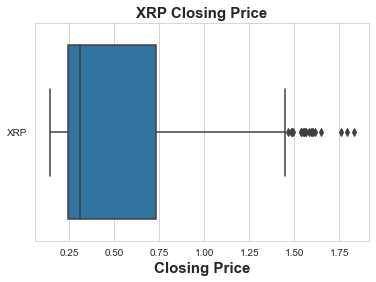

In [18]:
# Generate a box plot of the XRP closing price
ax = sns.boxplot(data=close_price_df[['XRP']], orient="h")

ax.set_title("XRP Closing Price", weight='bold', size=15)
ax.set_xlabel("Closing Price", weight='bold', size=15)
plt.savefig("Images/box_plot_XRP.png")
plt.show()




## XRP a box plot shows the quartiles of the dataset to determine the outliers.
On the box plot above, we see that XRP closing dayly price was most of the time between $0.25 and $0.74 in the last couple of years. All values over $1.45 are outliers.

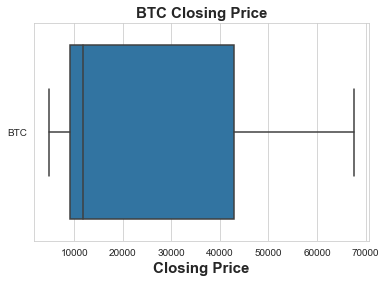

In [19]:
# Generate a box plot of the BTC closing price
ax = sns.boxplot(data=close_price_df[['BTC']], orient="h")
ax.set_title("BTC Closing Price", weight='bold', size=15)
ax.set_xlabel("Closing Price", weight='bold', size=15)
plt.savefig("Images/box_plot_BTC.png")
plt.show()

## BTC a box plot shows the quartiles of the dataset to determine the outliers.
On the box plot above, we see that BTC closing dayly price was most of the time between $10,000 and $40,000 in the last couple of years.This chart will not give us a lot of usefull data, because difference between the highest($67,559) and the lowest($4,841) BTC price was more than $60,000 in the last 2 years.

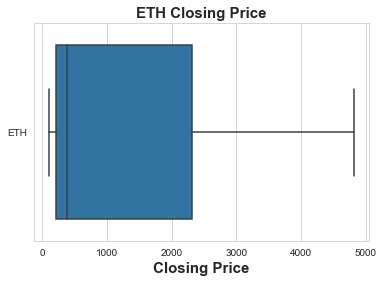

In [20]:
# Generate a box plot of the ETH closing price
ax = sns.boxplot(data=close_price_df[['ETH']], orient="h")
ax.set_title("ETH Closing Price", weight='bold', size=15)
ax.set_xlabel("Closing Price", weight='bold', size=15)
plt.savefig("Images/box_plot_ETH.png")
plt.show()

## ETH a box plot shows the quartiles of the dataset to determine the outliers.
On the box plot above, we see that ETH closing dayly price was most of the time between $200 and $2,300 in the last couple of years.This chart will not give us a lot of usefull data, because difference between the highest($4,811) and the lowest($109) ETH price was more than $4,500 in the last 2 years.

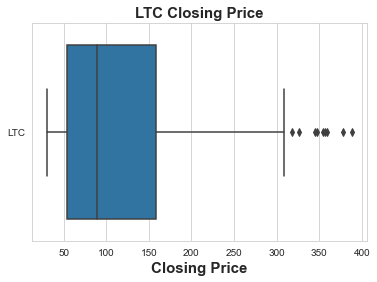

In [21]:
# Generate a box plot of the LTC closing price
ax = sns.boxplot(data=close_price_df[['LTC']], orient="h")
ax.set_title("LTC Closing Price", weight='bold', size=15)
ax.set_xlabel("Closing Price", weight='bold', size=15)
plt.savefig("Images/box_plot_LTC.png")
plt.show()

## LTC a box plot shows the quartiles of the dataset to determine the outliers.
On the box plot above, we see that LTC closing dayly price was most of the time between $50 and $160 in the last couple of years. All values over $300 are outliers.

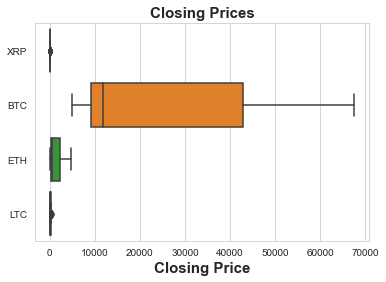

In [22]:
# Generate a box plot of all 4 coins
ax = sns.boxplot(data=close_price_df[['XRP', 'BTC', 'ETH', 'LTC']], orient="h")

ax.set_title("Closing Prices", weight='bold', size=15)
ax.set_xlabel("Closing Price", weight='bold', size=15)
plt.savefig("Images/box_plot_4coins.png")
plt.show()


### Observation
This plot can't provide us any useful informatiom because difference in prices for each coin is too substantial.

## Histogram for each coin to see the frequency for a specific price!!!

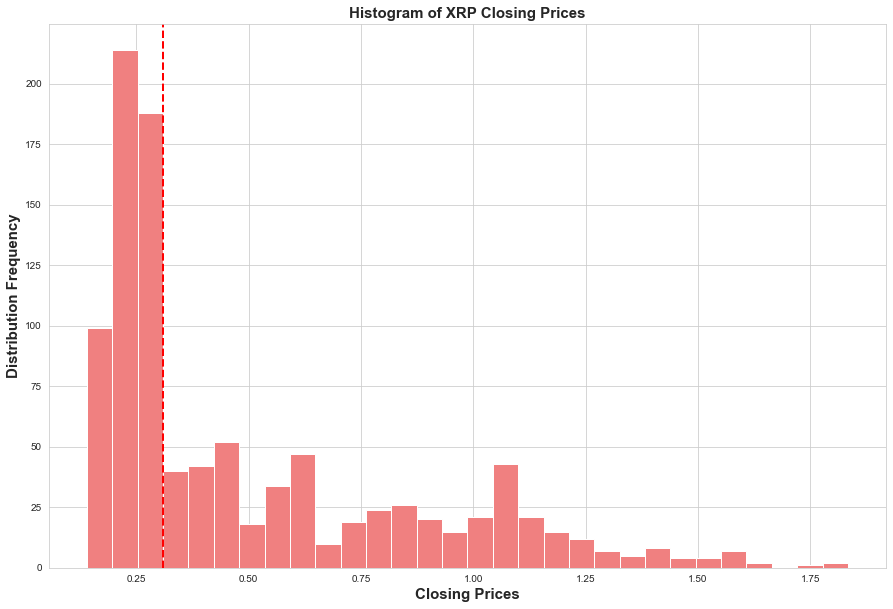

In [23]:
#XRP Distribution Frequency

close_price_df['XRP'].plot(kind='hist',bins=30, figsize=(15,10), color='lightcoral').axvline(close_price_df['XRP'].median(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Closing Prices", weight='bold', size=15)
plt.ylabel("Distribution Frequency", weight='bold', size=15)
plt.title("Histogram of XRP Closing Prices",weight='bold', size=15)
plt.savefig("Images/hist_XRP.png")
plt.show()

### Observation of XRP closing price, observations.
Let’s estimate the frequency distribution of XRP closing prices. The histogram shows the number of days XRP had a certain value.
XRP closing price was around $0.25-$0.30 for most of the days.
It has right-skewed distribution because a natural limit prevents outcomes on one side.
Red dashed line (median) shows that the closing prices of XRP were under $0.30.

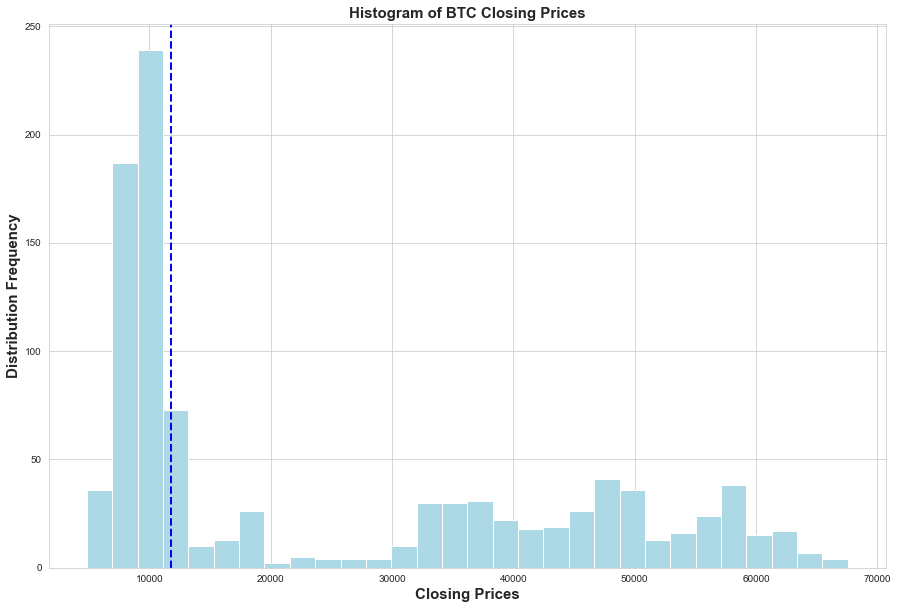

In [24]:
#BTC Distribution Frequency

close_price_df['BTC'].plot(kind='hist',bins=30, figsize=(15,10), color='lightblue').axvline(close_price_df['BTC'].median(), color='b', linestyle='dashed', linewidth=2)
plt.xlabel("Closing Prices", weight='bold', size=15)
plt.ylabel("Distribution Frequency", weight='bold', size=15)
plt.title("Histogram of BTC Closing Prices",weight='bold', size=15)
plt.savefig("Images/hist_BTC.png")
plt.show()



### Observation of BTC closing price, observations.
Let’s estimate the frequency distribution of BTC closing prices. The histogram shows the number of days BTC had a certain value.
BTC was holding it's closing price in a range of $10,000 for most of the days. Eventhough, BTC has right-skewed distribution, and blue dashed line (median) shows that the closing prices of BTC were around $12,000, we can't rely on this data, because difference between the highest($67,559) and the lowest($4,841) BTC price was more than $60,000 in the last 2 years. 
On the other hand, when bitcoin has managed to break the barrier of $35,000 and when the price of the coin was increasing the distribution frequency was unchanging. However we can see a big swing at $50,000 and $60,000.
 


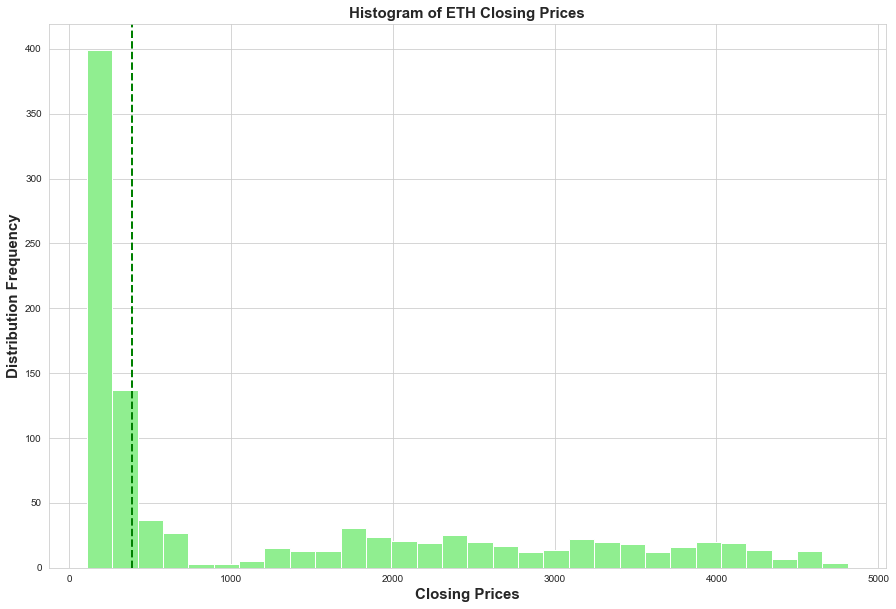

In [25]:
#ETH Distribution Frequency

close_price_df['ETH'].plot(kind='hist',bins=30, figsize=(15,10), color='lightgreen').axvline(close_price_df['ETH'].median(), color='g', linestyle='dashed', linewidth=2)
plt.xlabel("Closing Prices", weight='bold', size=15)
plt.ylabel("Distribution Frequency", weight='bold', size=15)
plt.title("Histogram of ETH Closing Prices",weight='bold', size=15)
plt.savefig("Images/hist_ETH.png")
plt.show()

### Observation of ETH closing price, observations.
Let’s estimate the frequency distribution of ETH closing prices. The histogram shows the number of days ETH had a certain value.
ETH closing price was around $200 for most of the days.
It has right-skewed distribution because a natural limit prevents outcomes on one side.
Green dashed line (median) shows that the closing prices of ETH were under $500.


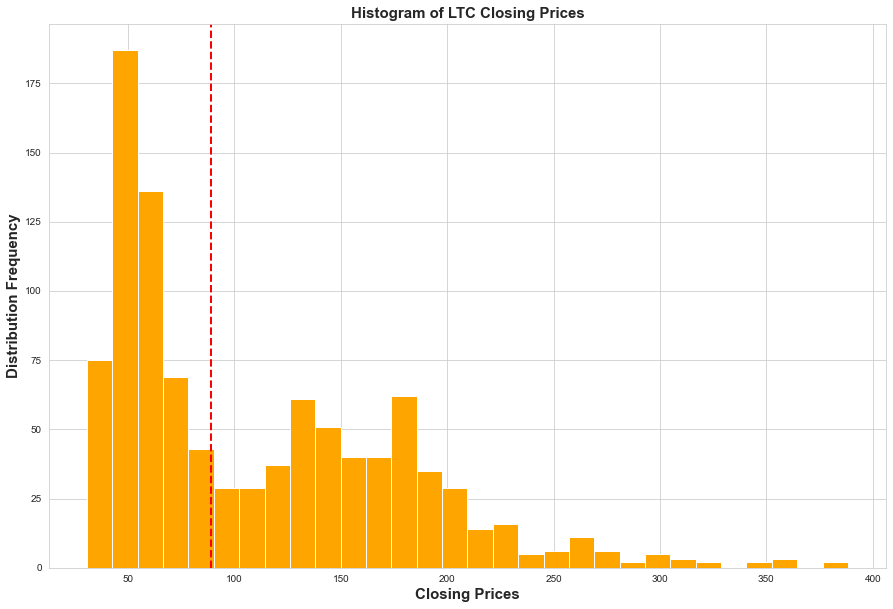

In [26]:
#LTC Distribution Frequency

close_price_df['LTC'].plot(kind='hist',bins=30, figsize=(15,10), color='orange').axvline(close_price_df['LTC'].median(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel("Closing Prices", weight='bold', size=15)
plt.ylabel("Distribution Frequency", weight='bold', size=15)
plt.title("Histogram of LTC Closing Prices",weight='bold', size=15)
plt.savefig("Images/hist_LTC.png")
plt.show()

## Observation of LTC closing price, observations.
Let’s estimate the frequency distribution of LTC closing prices. The histogram shows the number of days LTC had a certain value.
LTC closing price was around $50 for most of the days.
It has right-skewed distribution because a natural limit prevents outcomes on one side.
Red dashed line (median) shows that the closing prices of ETH were under $80.


## Closing prices for the given time period!!!

## Observation
Because the difference in prices for each coin is too substantial, we had to make a number of plots. If we would plot all 4 coins into one chart XRP, ETH and LTC, would only make a flat line towards the bottom of the chart. Therefore, plot with BTC, will have y-axis go up to $70,0000, ETH with LTC will go up to $5,000, and XRP will go up only to $1.75 on its y-axis. 

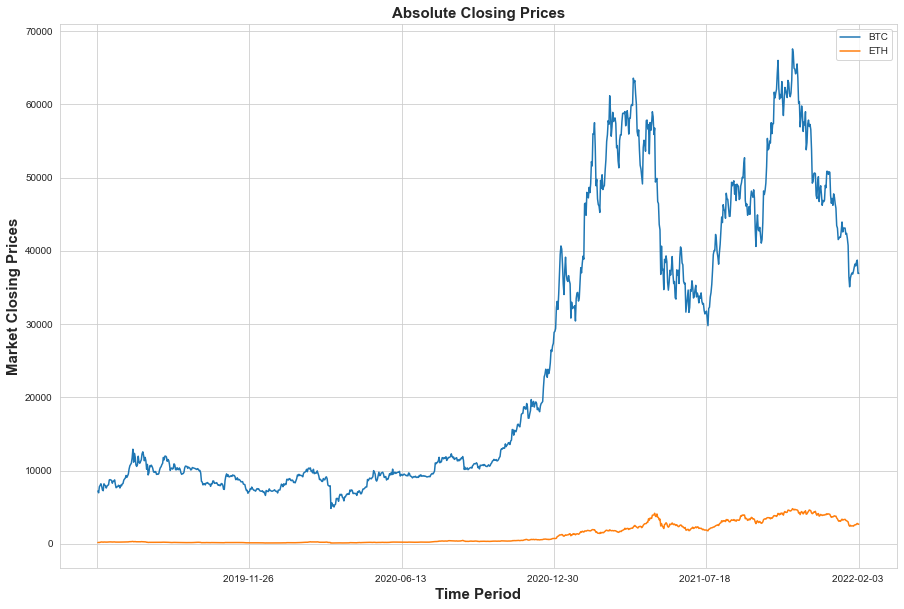

In [27]:
#BTC and ETH closing price plot for the past two years

close_price_df[["BTC", "ETH"]].plot(figsize=(15, 10))
plt.gca().invert_xaxis()
plt.xlabel("Time Period", weight='bold', size=15)
plt.ylabel("Market Closing Prices", weight='bold', size=15)
plt.title("Absolute Closing Prices",weight='bold', size=15)
plt.savefig("Images/absolute_clo_p_BTC_ETH.png")
plt.show()

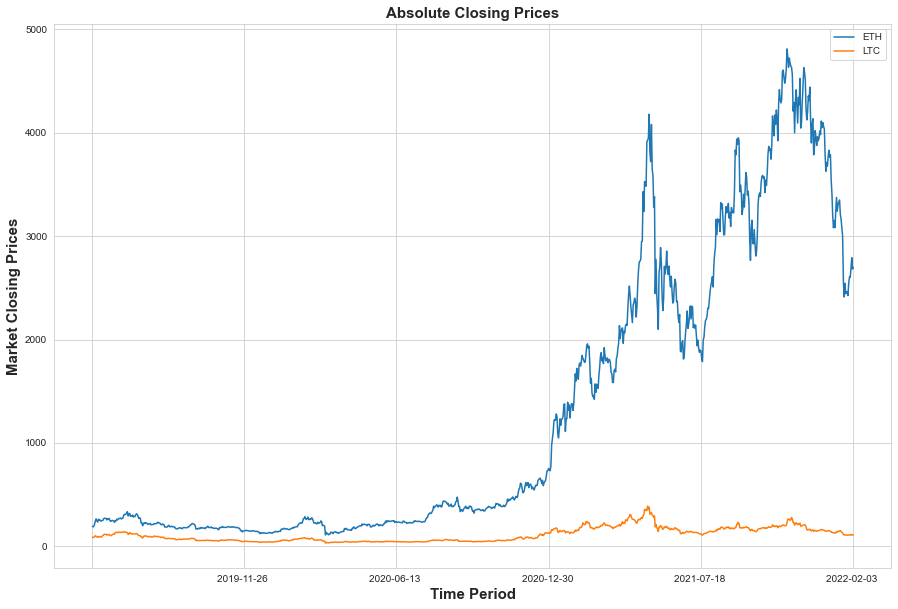

In [28]:
#ETH and LTC closing price plot for the past two years

close_price_df[["ETH", "LTC"]].plot(figsize=(15, 10))
plt.gca().invert_xaxis()
plt.xlabel("Time Period", weight='bold', size=15)
plt.ylabel("Market Closing Prices", weight='bold', size=15)
plt.title("Absolute Closing Prices",weight='bold', size=15)
plt.savefig("Images/absolute_clo_p_ETH_LTC.png")
plt.show()

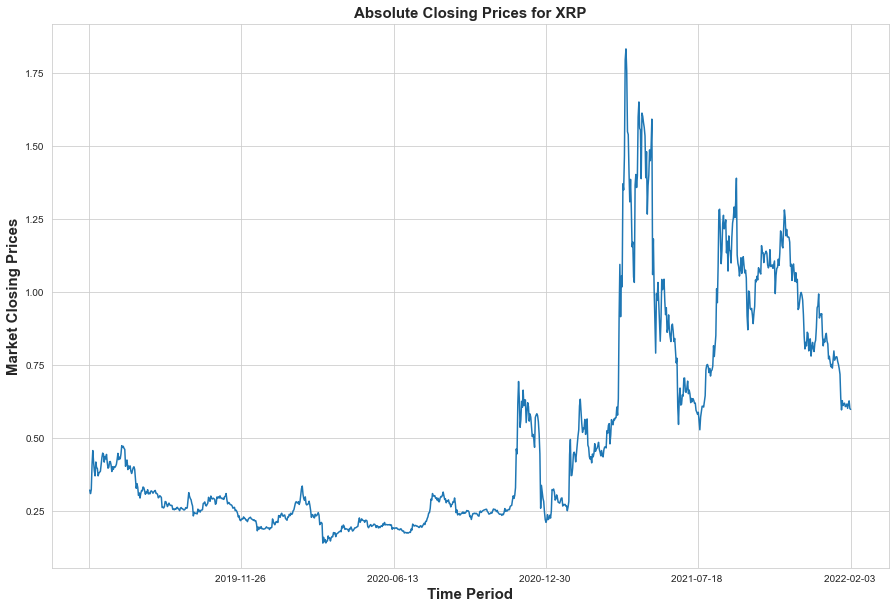

In [29]:
#XRP closing price plot for the past two years

close_price_df["XRP"].plot(figsize=(15, 10))
plt.gca().invert_xaxis()
plt.xlabel("Time Period", weight='bold', size=15)
plt.ylabel("Market Closing Prices", weight='bold', size=15)
plt.title("Absolute Closing Prices for XRP",weight='bold', size=15)
plt.savefig("Images/absolute_clo_p_XRP.png")
plt.show()

## Buy and hold strategy

### Buy and hold strategy

Buy and hold is a passive investment strategy in which an investor buys a cryptocurrency and holds it for a long period, regardless of fluctuations in the market.
Let’s analyze returns using the Buy and hold strategy for the past 2 years. We calculate the return percentage, where t represents a certain period and price0 is the initial closing price:

return(time,0)=(frac{price_t}/{price_0})

In [30]:
#calculate returns on the daily transactions% % % % % % % % %
return_df = close_price_df.apply(lambda x: x / x[0])

return_df

,XRP,BTC,ETH,LTC
Date for Closing Price,,,,
2022-02-03,1.000000,1.000000,1.000000,1.000000
2022-02-02,1.004276,1.000235,0.994502,1.001849
2022-02-01,1.048787,1.049254,1.034818,1.063973
2022-01-31,1.031183,1.042723,0.996952,1.013312
2022-01-30,1.005896,1.027821,0.964866,1.005732
...,...,...,...,...
2019-05-15,0.764368,0.222368,0.092242,0.944347
2019-05-14,0.680290,0.216336,0.080641,0.845798
2019-05-13,0.540394,0.211569,0.072844,0.812332


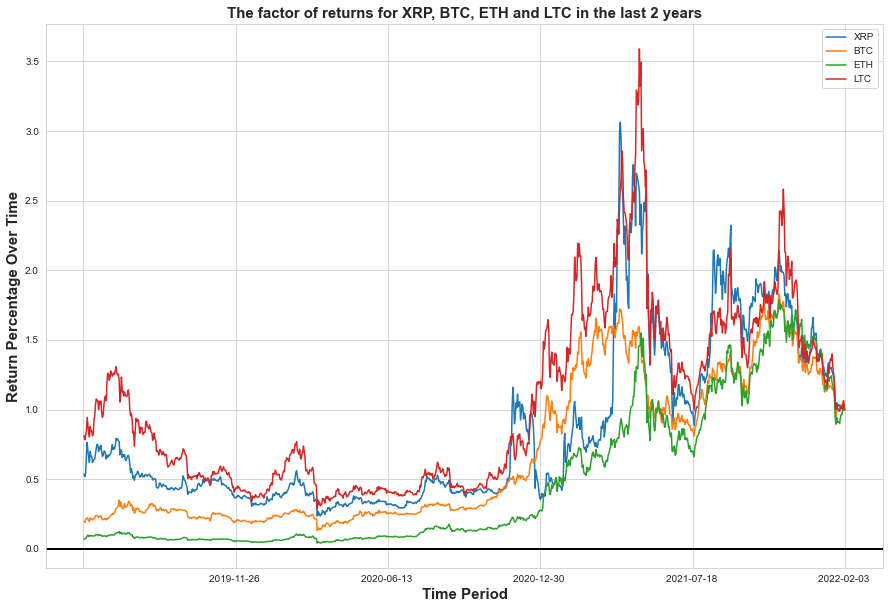

In [31]:
#Plot the return percentages 
return_df.plot(grid=True, figsize=(15, 10)).axhline(y = 0, color = "black", lw = 2)
plt.gca().invert_xaxis()
plt.xlabel("Time Period", weight='bold', size=15)
plt.ylabel("Return Percentage Over Time", weight='bold', size=15)
plt.title("The factor of returns for XRP, BTC, ETH and LTC in the last 2 years",weight='bold', size=15)
plt.savefig("Images/return_4coins.png")
plt.show()

In [32]:
percentage_df = return_df.head(1000) * 100
#cm = sns.light_palette("green", as_cmap=True)

#s = percentage_df.style.background_gradient(cmap=cm)
#s
percentage_df

,XRP,BTC,ETH,LTC
Date for Closing Price,,,,
2022-02-03,100.000000,100.000000,100.000000,100.000000
2022-02-02,100.427572,100.023514,99.450156,100.184894
2022-02-01,104.878660,104.925447,103.481849,106.397338
2022-01-31,103.118267,104.272268,99.695232,101.331238
2022-01-30,100.589581,102.782080,96.486636,100.573172
...,...,...,...,...
2019-05-15,76.436791,22.236841,9.224249,94.434686
2019-05-14,68.028995,21.633588,8.064127,84.579828
2019-05-13,54.039383,21.156950,7.284410,81.233244


In [33]:
percentage_df.describe()

,XRP,BTC,ETH,LTC
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,84.596917,67.468585,47.362443,102.608542
std,60.508067,51.749430,51.665217,62.598744
min,23.484709,13.115789,4.056905,28.436720
25%,40.176290,24.947298,7.783737,49.392160
50%,51.624271,31.838500,14.312992,82.444301
75%,122.174436,116.260380,85.953773,146.863733
max,306.273278,183.013218,178.396666,358.990478


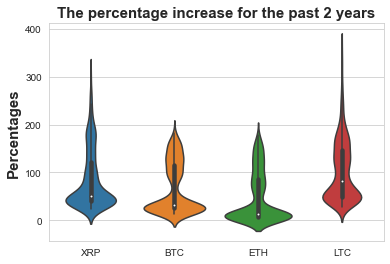

In [34]:
#What is the percentage increase over 1000 days?

ax = sns.violinplot(data=percentage_df)
ax.set_title("The percentage increase for the past 2 years", weight='bold', size=15)
ax.set_ylabel("Percentages", weight='bold', size=15)
plt.savefig("Images/percentage_4coins.png")
plt.show()


## Investment Part

In [35]:
#How many coins could we bought for $1000, based on the last available price?
budget = 1000 # USD
coins_df = budget/close_price_df.tail(1)
coins_df

,XRP,BTC,ETH,LTC
Date for Closing Price,,,,
2019-05-11,3103.469679,0.138553,5.208333,11.379153


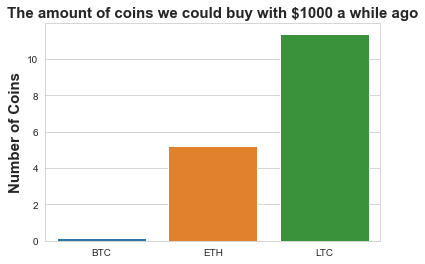

In [36]:
#Total coins that we bought
ax = sns.barplot(data=coins_df[["BTC", "ETH", "LTC"]])
ax.set_title("The amount of coins we could buy with $1000 a while ago", weight='bold', size=15)
ax.set_ylabel("Number of Coins", weight='bold', size=15)
plt.savefig("Images/purchase_BTC,ETH,LTC.png")
plt.show()

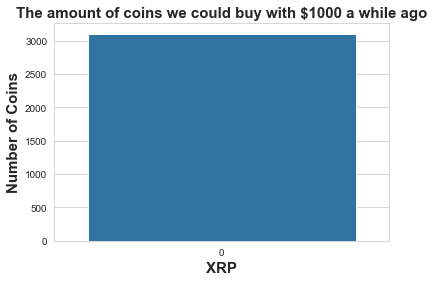

In [37]:
#Total coins that we bought
ax = sns.barplot(data=coins_df["XRP"])
ax.set_title("The amount of coins we could buy with $1000 a while ago", weight='bold', size=15)
ax.set_xlabel("XRP", weight='bold', size=15)
ax.set_ylabel("Number of Coins", weight='bold', size=15)
plt.savefig("Images/purchase_XRP.png")
plt.show()

In [38]:
#Last price available
close_price_df.head(1)

,XRP,BTC,ETH,LTC
Date for Closing Price,,,,
2022-02-03,0.59873,36914.82,2697.13,108.17


In [39]:
#Current value of the coins we bought a while ago
current_value_df = coins_df * close_price_df.head(1).values
current_value_df.reset_index(drop=True).style.set_caption("Current Value of the purchase") 



,XRP,BTC,ETH,LTC
0,1858.140401,5114.648208,14047.552083,1230.883022


In [40]:
#Return on Investment (ROI)%%%%%%%
ROI_value_df = (current_value_df-budget)/budget
ROI_value_df.reset_index(drop=True).style.set_caption("Return on Investment, percentage value if we bought on 2019/05/11 and sold 2022/02/03") 

,XRP,BTC,ETH,LTC
0,0.858140,4.114648,13.047552,0.230883


In [41]:
#Return on Investment (ROI)$$$$$$$$$$$
ROI_value_df = (current_value_df-budget)

ROI_value_df.reset_index(drop=True).style.set_caption("Return on Investment, dollar value if we bought on 2019/05/11 and sold 2022/02/03") 

,XRP,BTC,ETH,LTC
0,858.140401,4114.648208,13047.552083,230.883022
